## Dimentionality reduction method on Project days
This section is to identify the appropriate dimentionality reduction method.

In [62]:
# Import required package

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import preprocessing

import numpy as np

In [63]:
# read the dataset file
data = pd.read_csv('Data_16nov.csv')

# Deleting the first columns of sequence number
data.drop(data.columns[0],axis=1,inplace=True)

# Printing basic info of dataset
print 'Number of records:',data.shape[0]
print 'Number of attributes:',data.shape[1]


# Printing Column names
print([a for a in data.columns])

Number of records: 77
Number of attributes: 12
['timestamp', 'group', 'disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']


In [64]:
# Printing sample of the dataset

data.head()
raw_data = data.drop(['timestamp','group'],axis=1)

In [65]:
data.describe()

,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.194805,0.510818,0.824688,0.681805,0.610390,0.493494,3.870130,2.077922,4.467532,5.545455
std,0.355000,0.409460,0.331021,0.354807,0.444777,0.410448,5.110234,3.311727,8.866828,8.828103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.667000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.667000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000
75%,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2.000000,4.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,13.000000,47.000000,50.000000


<IPython.core.display.Javascript object>


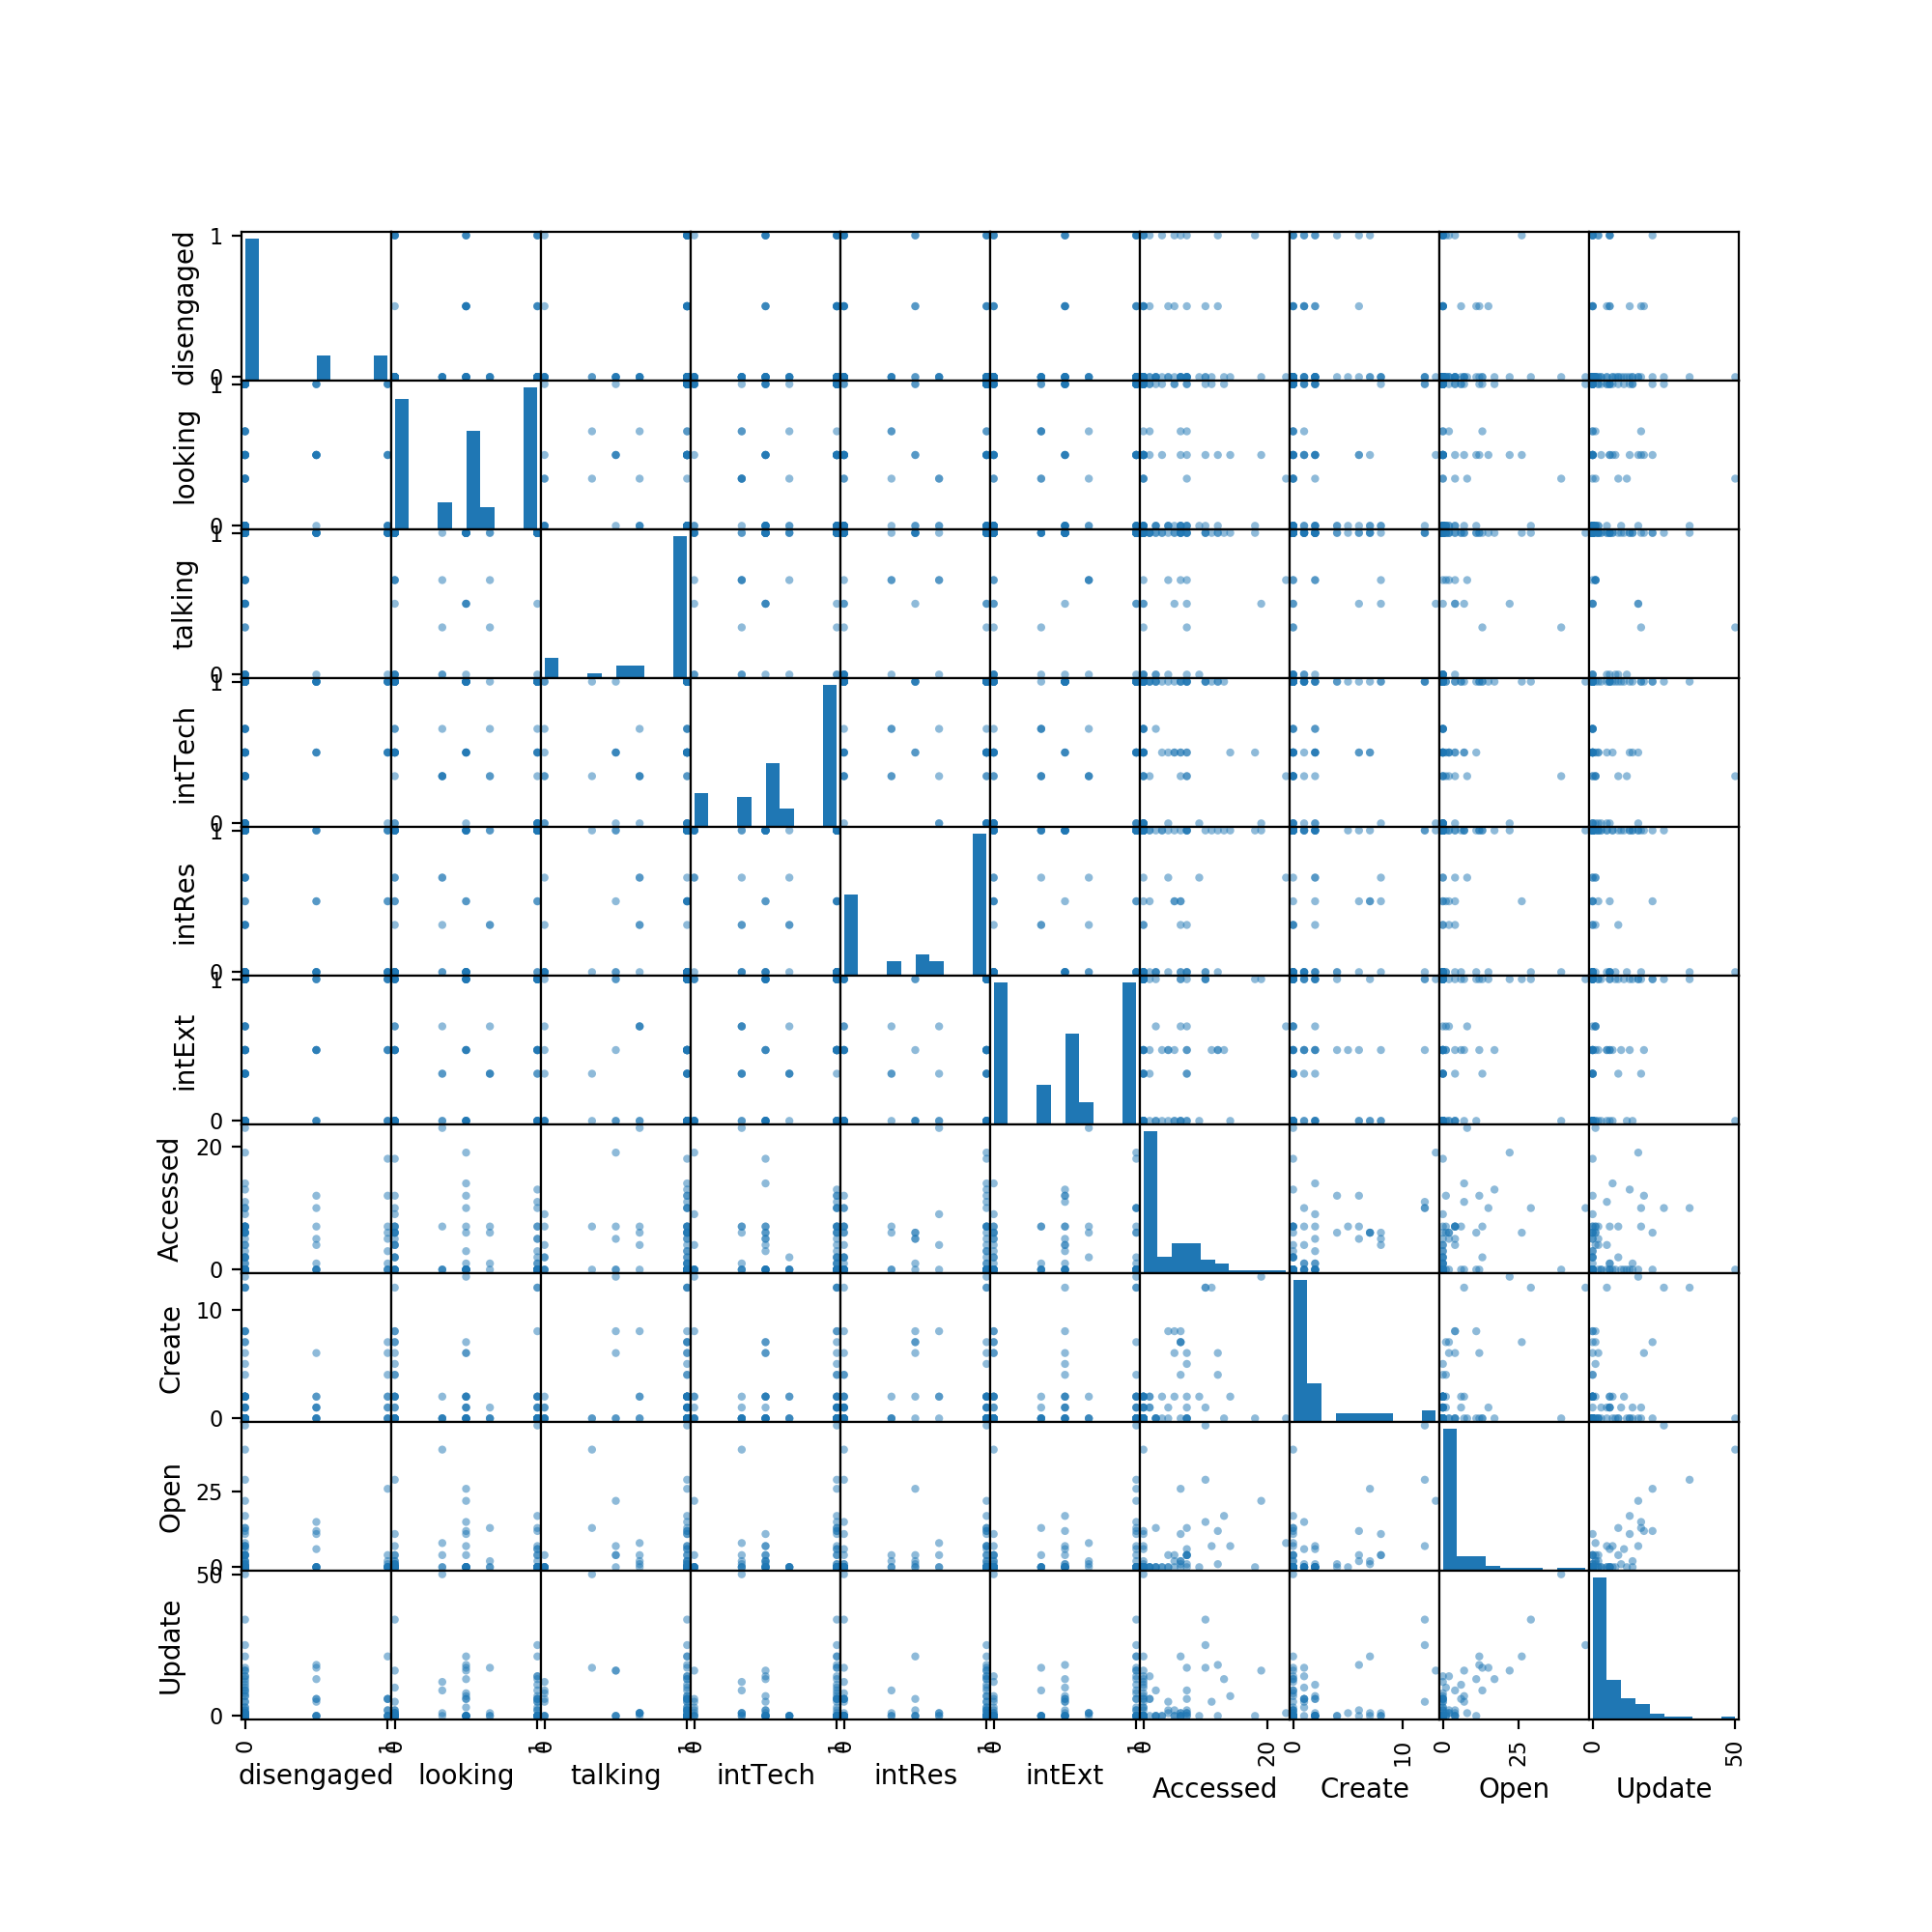

In [66]:

pd.plotting.scatter_matrix(data.iloc[:, 2:12], figsize=(10,10), diagonal="hist")

plt.show()

## Dimentionality reduction on raw (unscaled data)


#### 1. PCA 
PCA in python does not standardise the data. So in this section, we are looking on the pca projection of unstandardized data.

In [77]:
%matplotlib notebook
# Apply PCA
pca = decomposition.PCA(n_components = 2)
pca2d = pca.fit_transform(raw_data)

pca_raw = raw_data.copy()

# Adding pca results to data
pca_raw['pca-1'] = pca2d[:,0]
pca_raw['pca-2'] = pca2d[:,1]

corr_pca = pca_raw.corr()
pca_axis_corr = corr_pca.iloc[:-2,[-2,-1]]
#plt.figure(figsize=(10, 8))
#sns.heatmap(pca_raw.corr(),annot=True)

#### 2. Factor Analysis

<IPython.core.display.Javascript object>


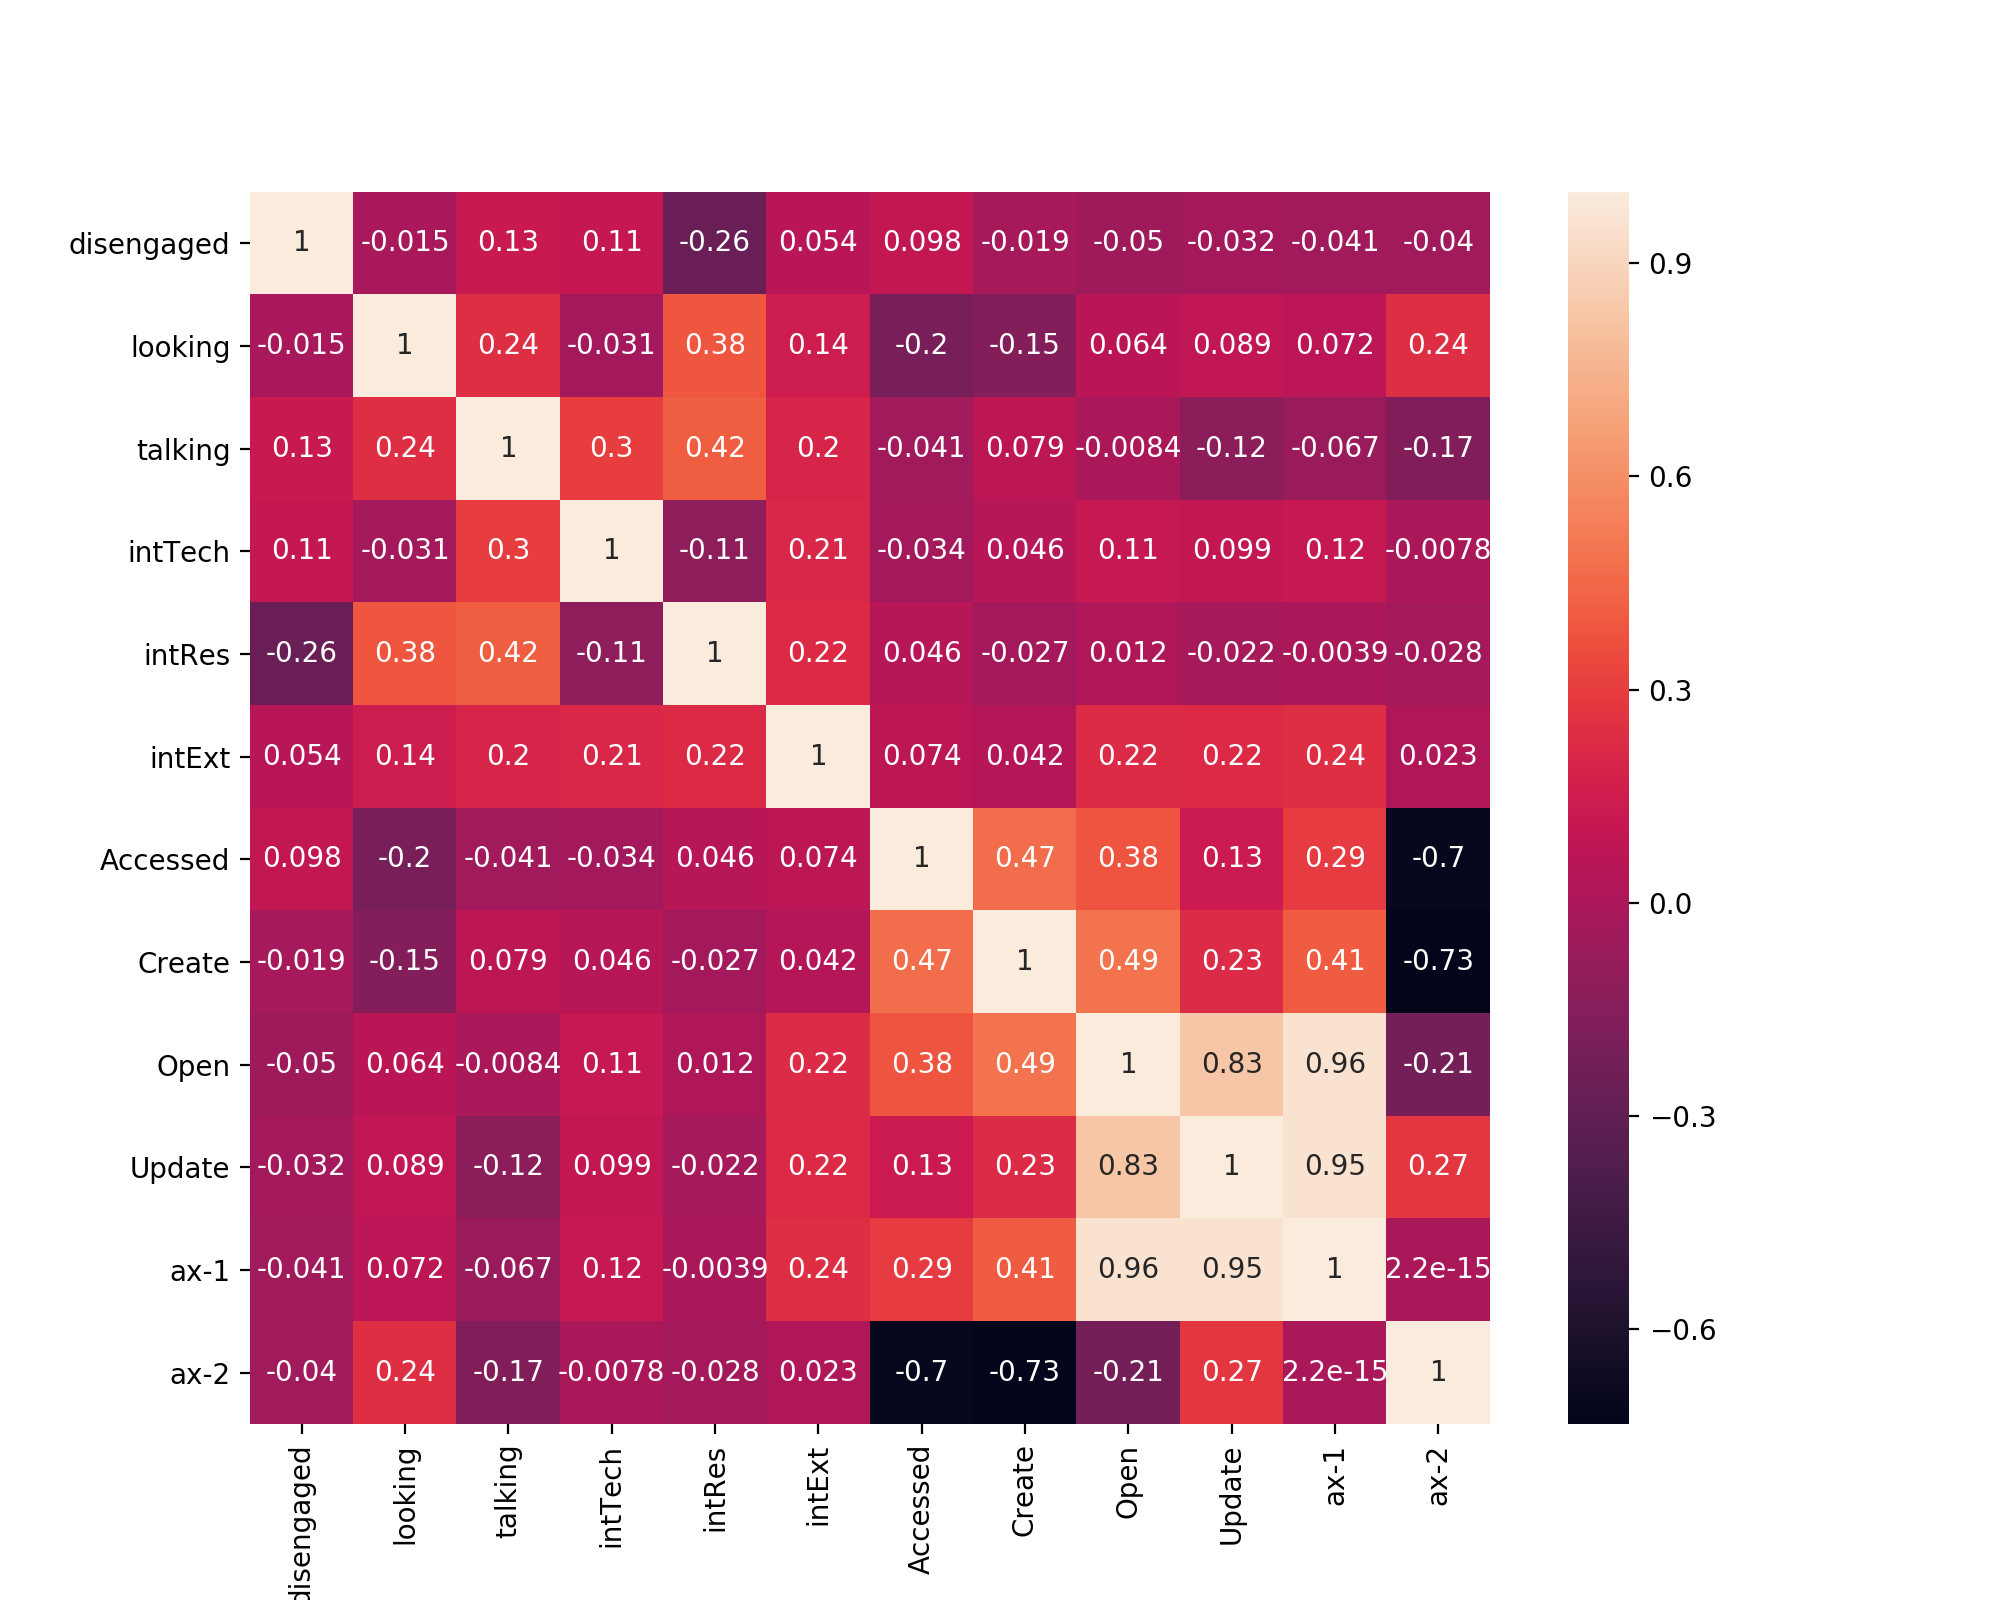

In [24]:
# Apply Factor Analysis
fa = decomposition.FactorAnalysis(n_components = 2)
fa2d = fa.fit_transform(raw_data)


fa_raw = raw_data
# Adding pca results to data
fa_raw['ax-1'] = fa2d[:,0]
fa_raw['ax-2'] = fa2d[:,1]

plt.figure(figsize=(10, 8))
sns.heatmap(fa_raw.corr(),annot=True)

#### 3. Isomap

<IPython.core.display.Javascript object>


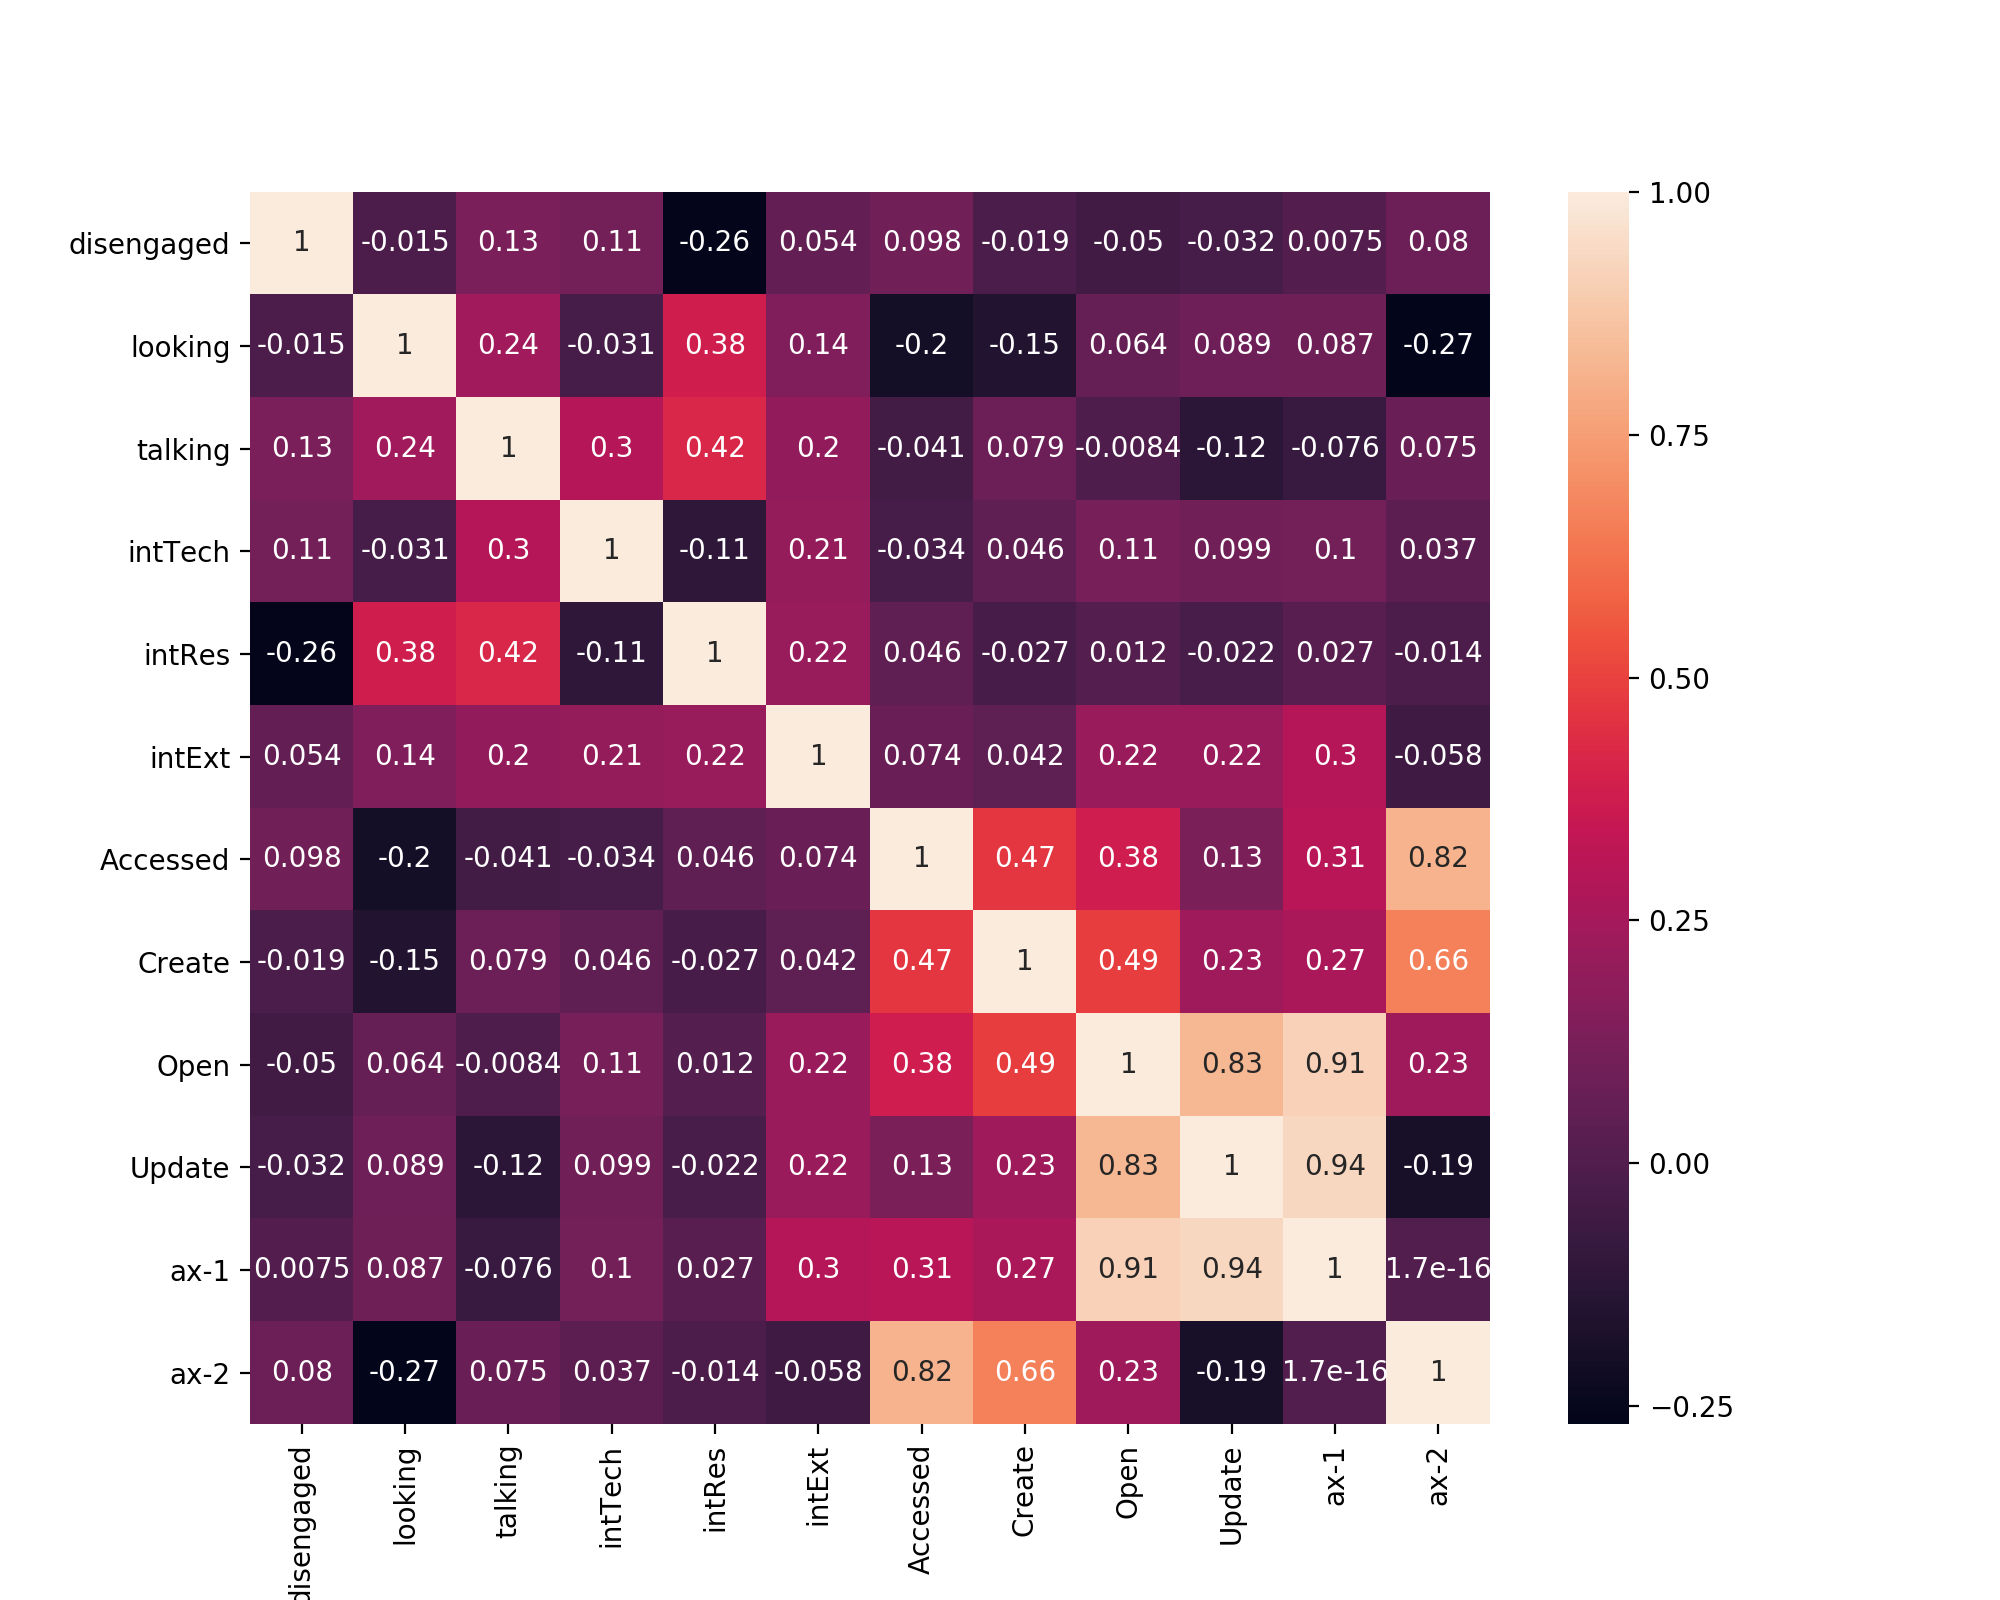

In [47]:
# Apply Factor Analysis
iso = Isomap(n_components = 2)
iso2d = iso.fit_transform(raw_data)


iso_raw = raw_data
# Adding pca results to data
iso_raw['ax-1'] = iso2d[:,0]
iso_raw['ax-2'] = iso2d[:,1]

plt.figure(figsize=(10, 8))
sns.heatmap(iso_raw.corr(),annot=True)

<IPython.core.display.Javascript object>


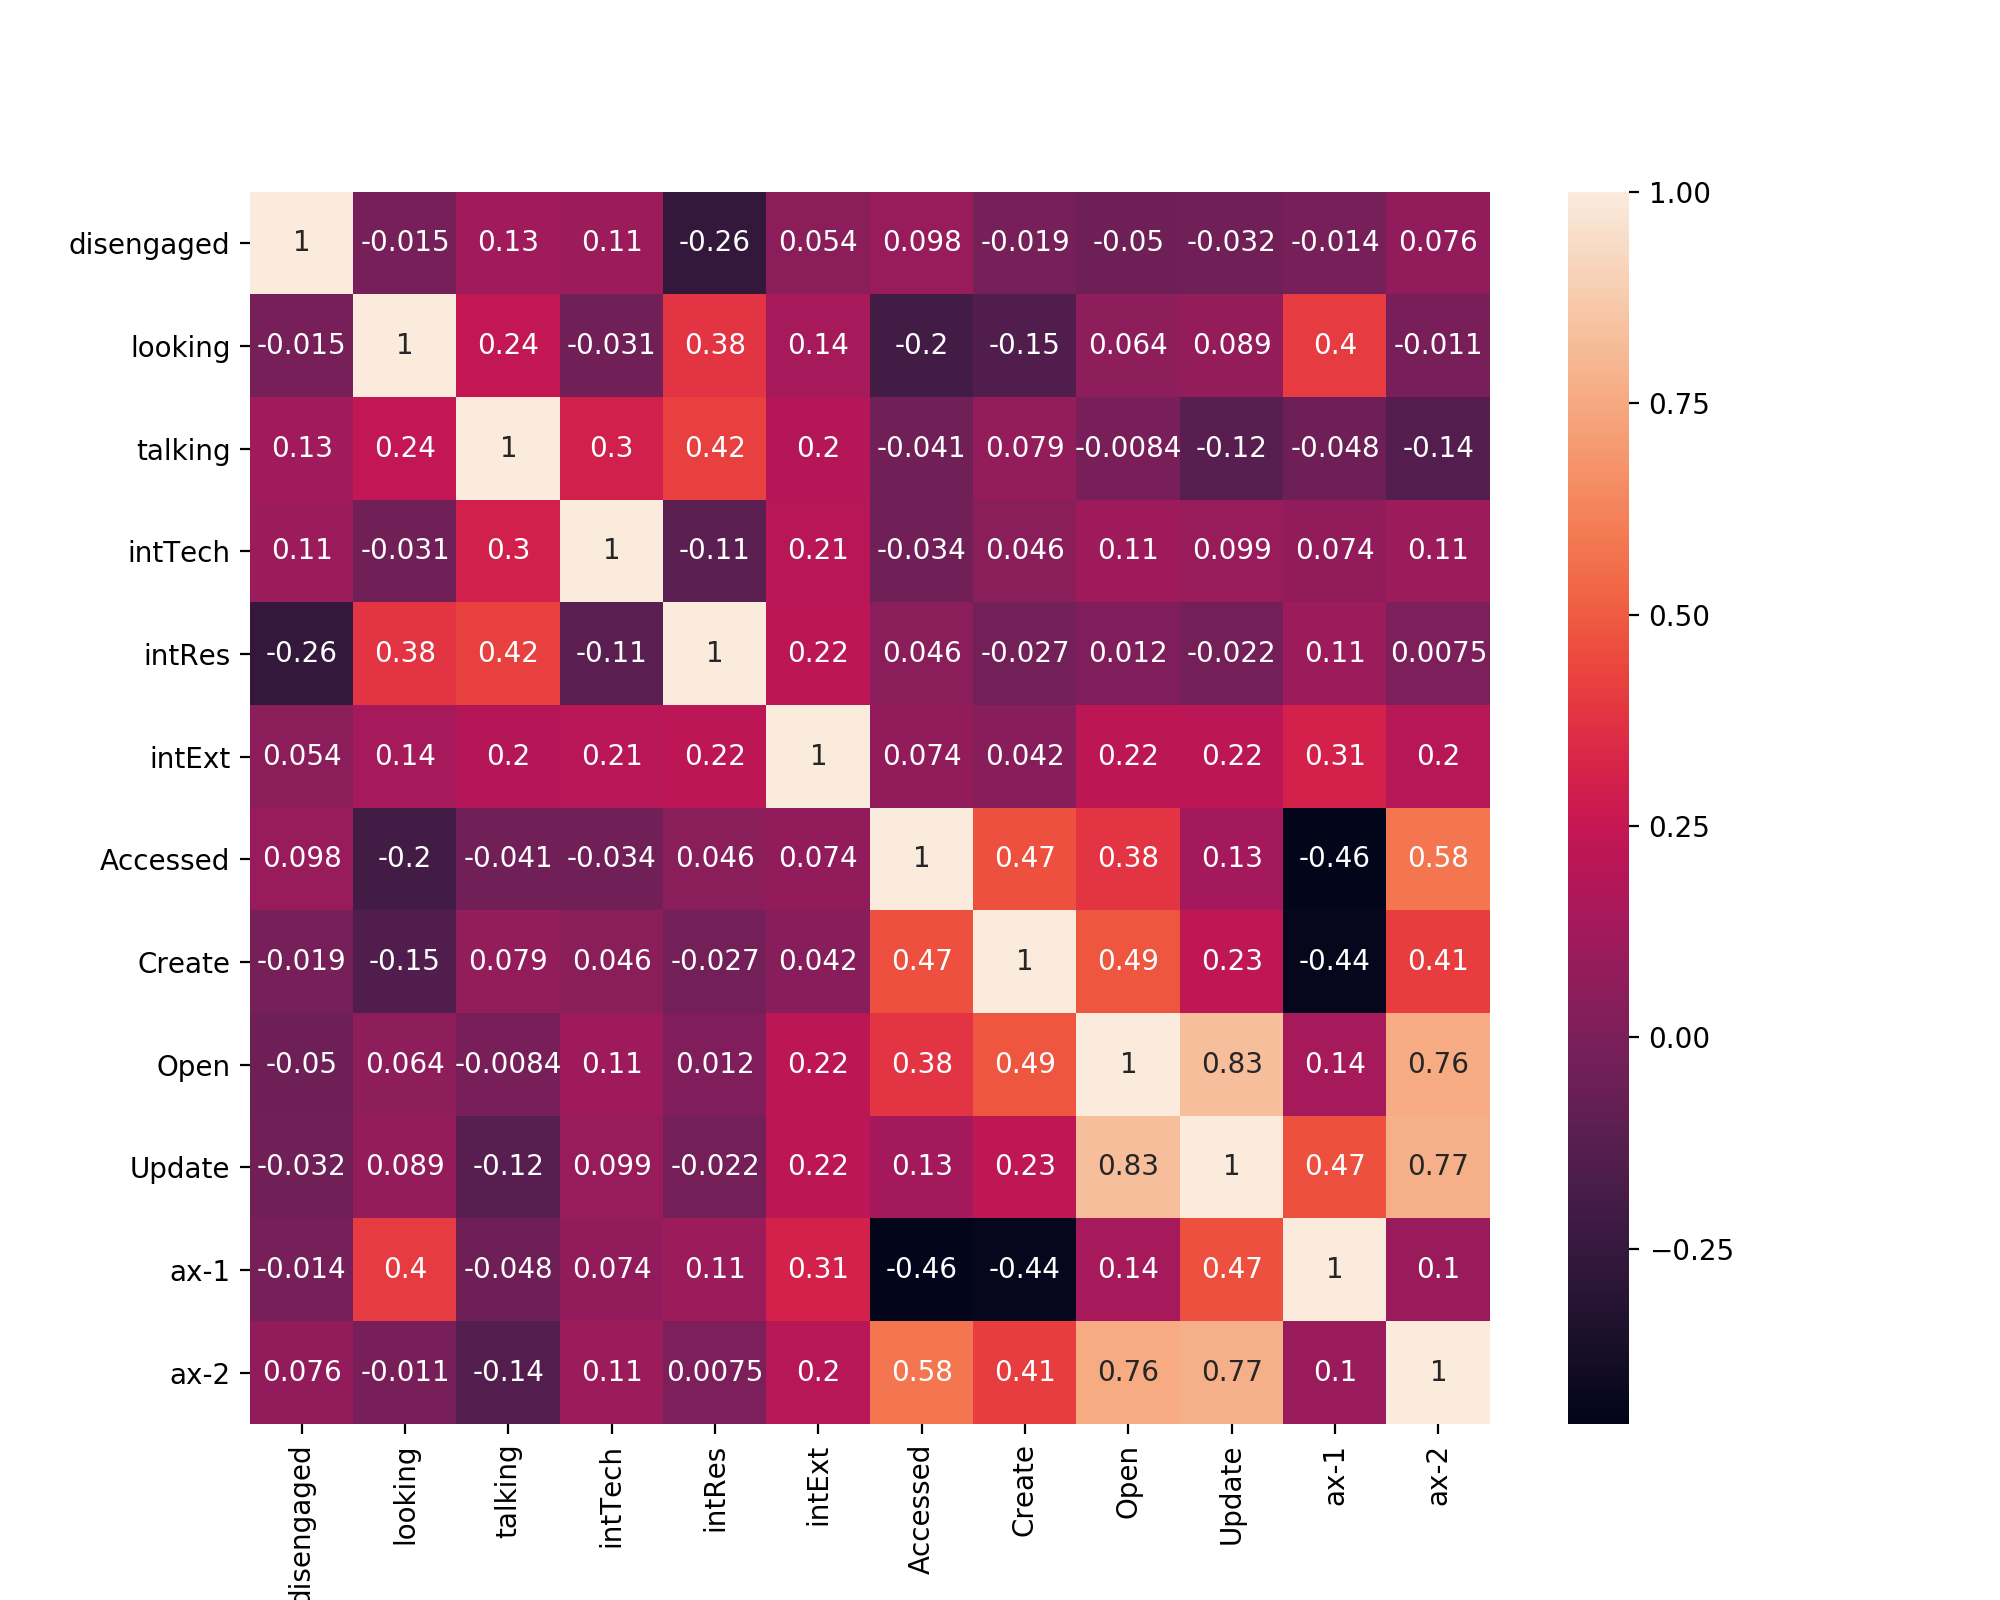

In [60]:
# Apply T-SNE
tsne = TSNE(n_components = 2)
tsne2d = tsne.fit_transform(raw_data)


tsne_raw = raw_data
# Adding pca results to data
tsne_raw['ax-1'] = tsne2d[:,0]
tsne_raw['ax-2'] = tsne2d[:,1]

plt.figure(figsize=(10, 8))
sns.heatmap(tsne_raw.corr(),annot=True)

### Dimention reduction on scaled data 

### 1.PCA 
First we will see how standardized scaling change the results on PCA.

<IPython.core.display.Javascript object>


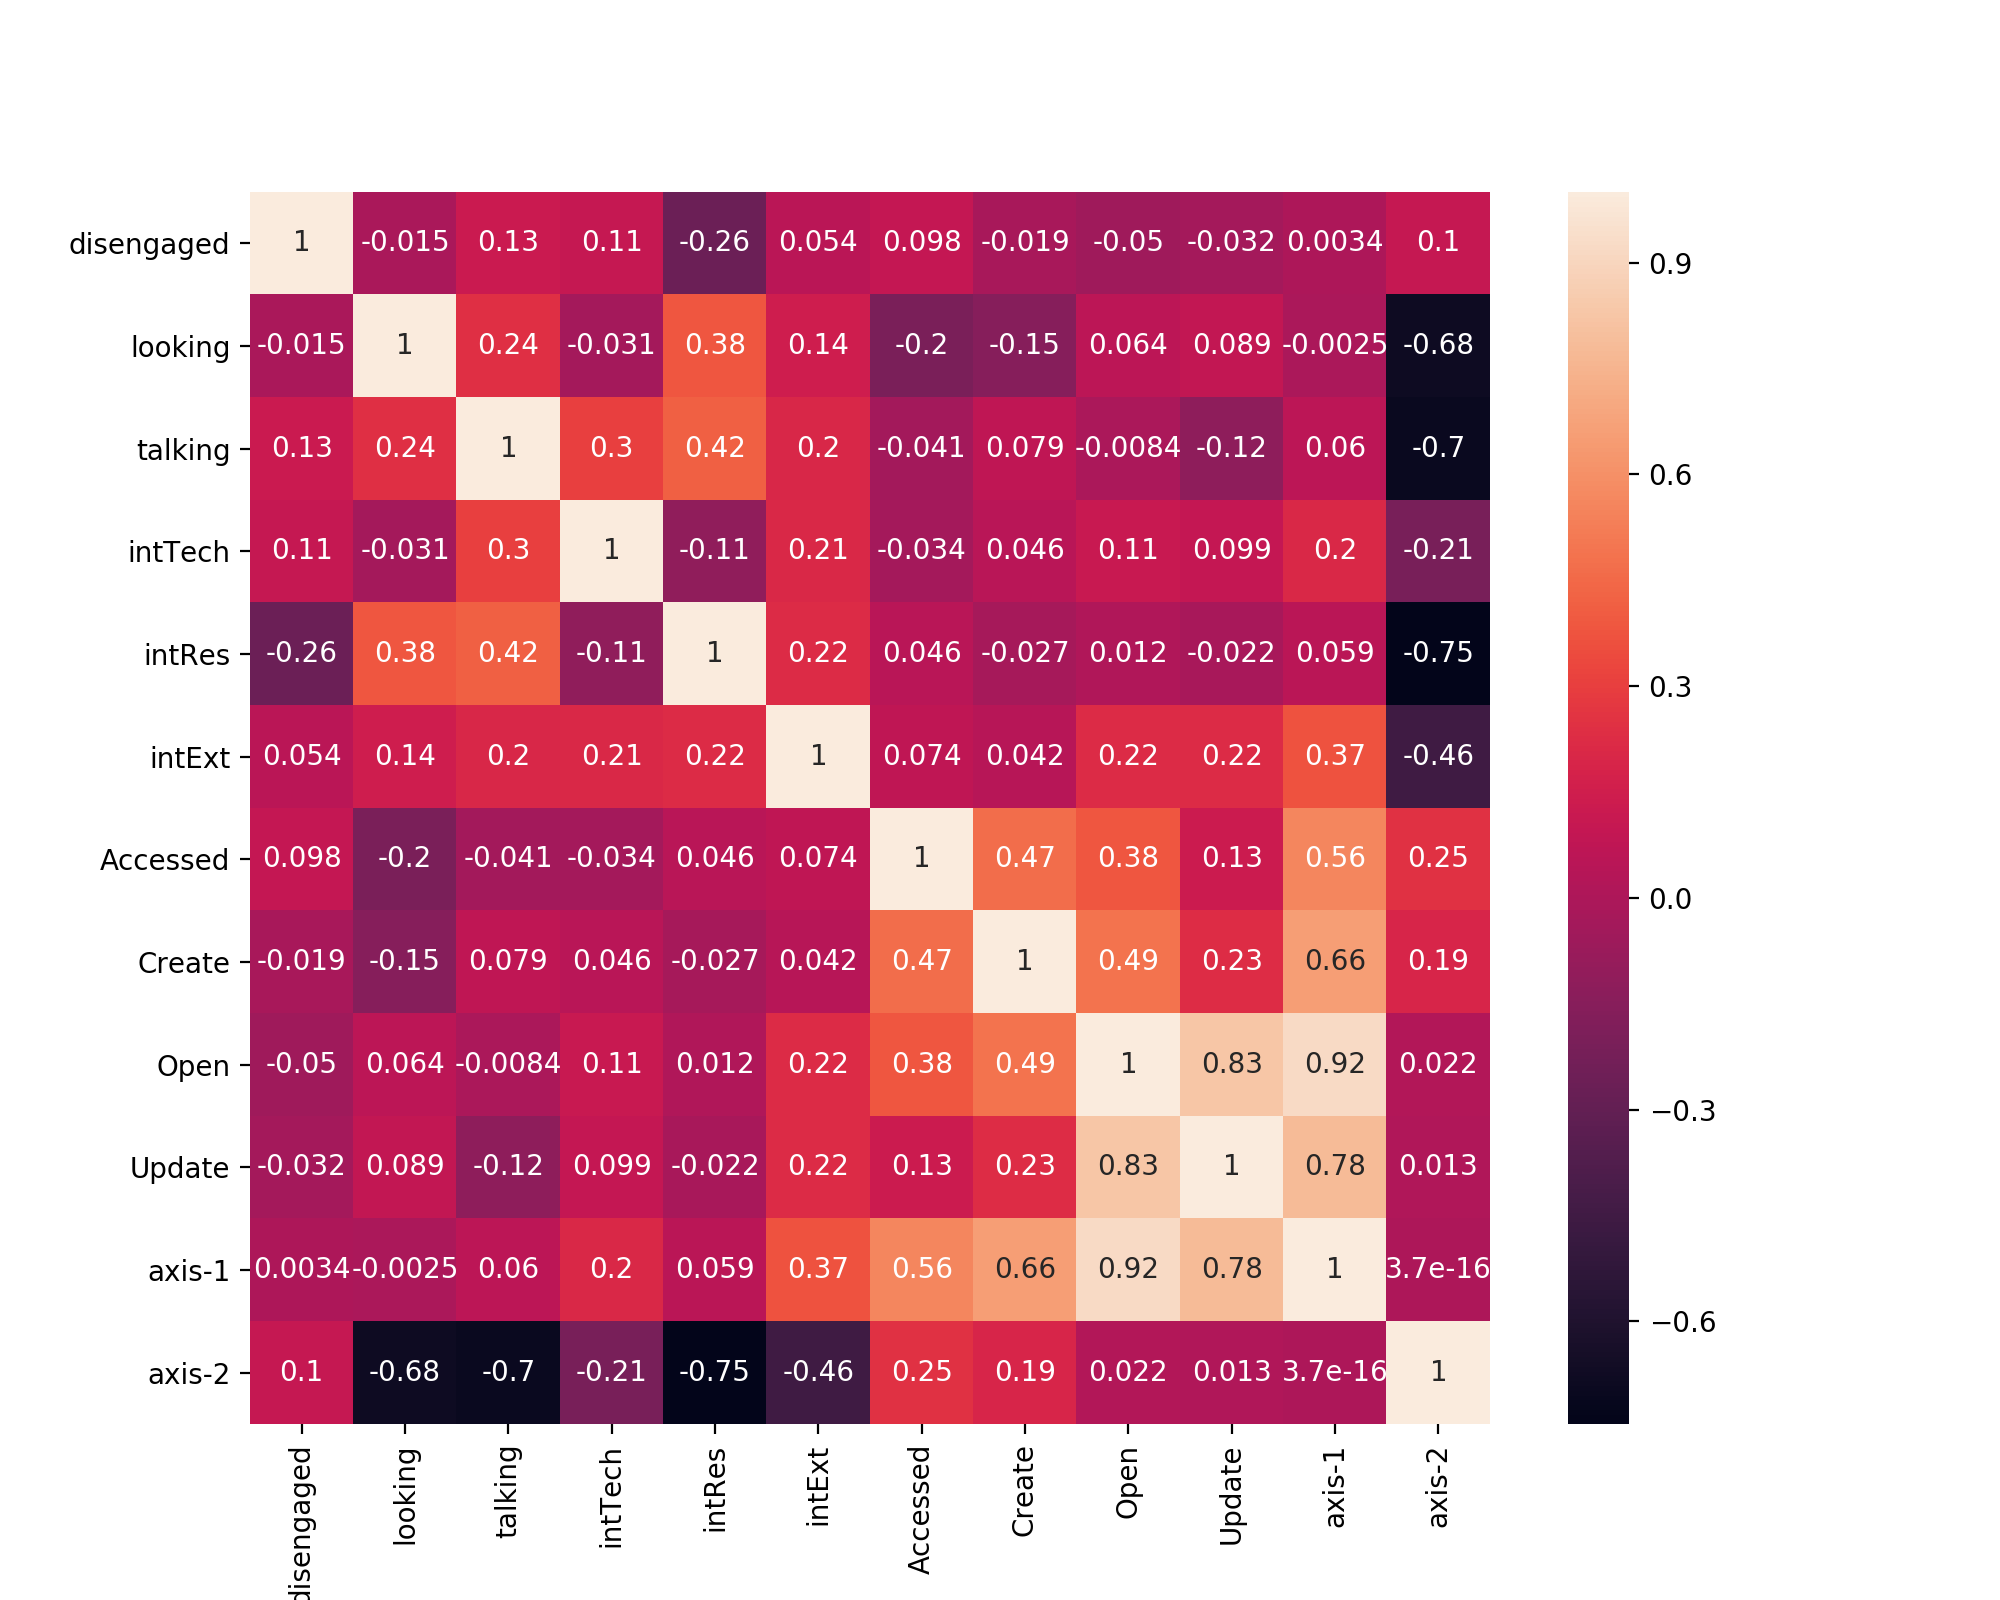

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
# Apply PCA on standardized data
pca = decomposition.PCA(n_components = 2)
scaled = preprocessing.StandardScaler().fit_transform(raw_data)
pca2d = pca.fit_transform(scaled)

pca2_raw = raw_data.copy()

# Adding pca results to data
pca2_raw['axis-1'] = pca2d[:,0]
pca2_raw['axis-2'] = pca2d[:,1]

plt.figure(figsize=(10, 8))
sns.heatmap(pca2_raw.corr(),annot=True)
np.std(scaled,axis=0)

<IPython.core.display.Javascript object>


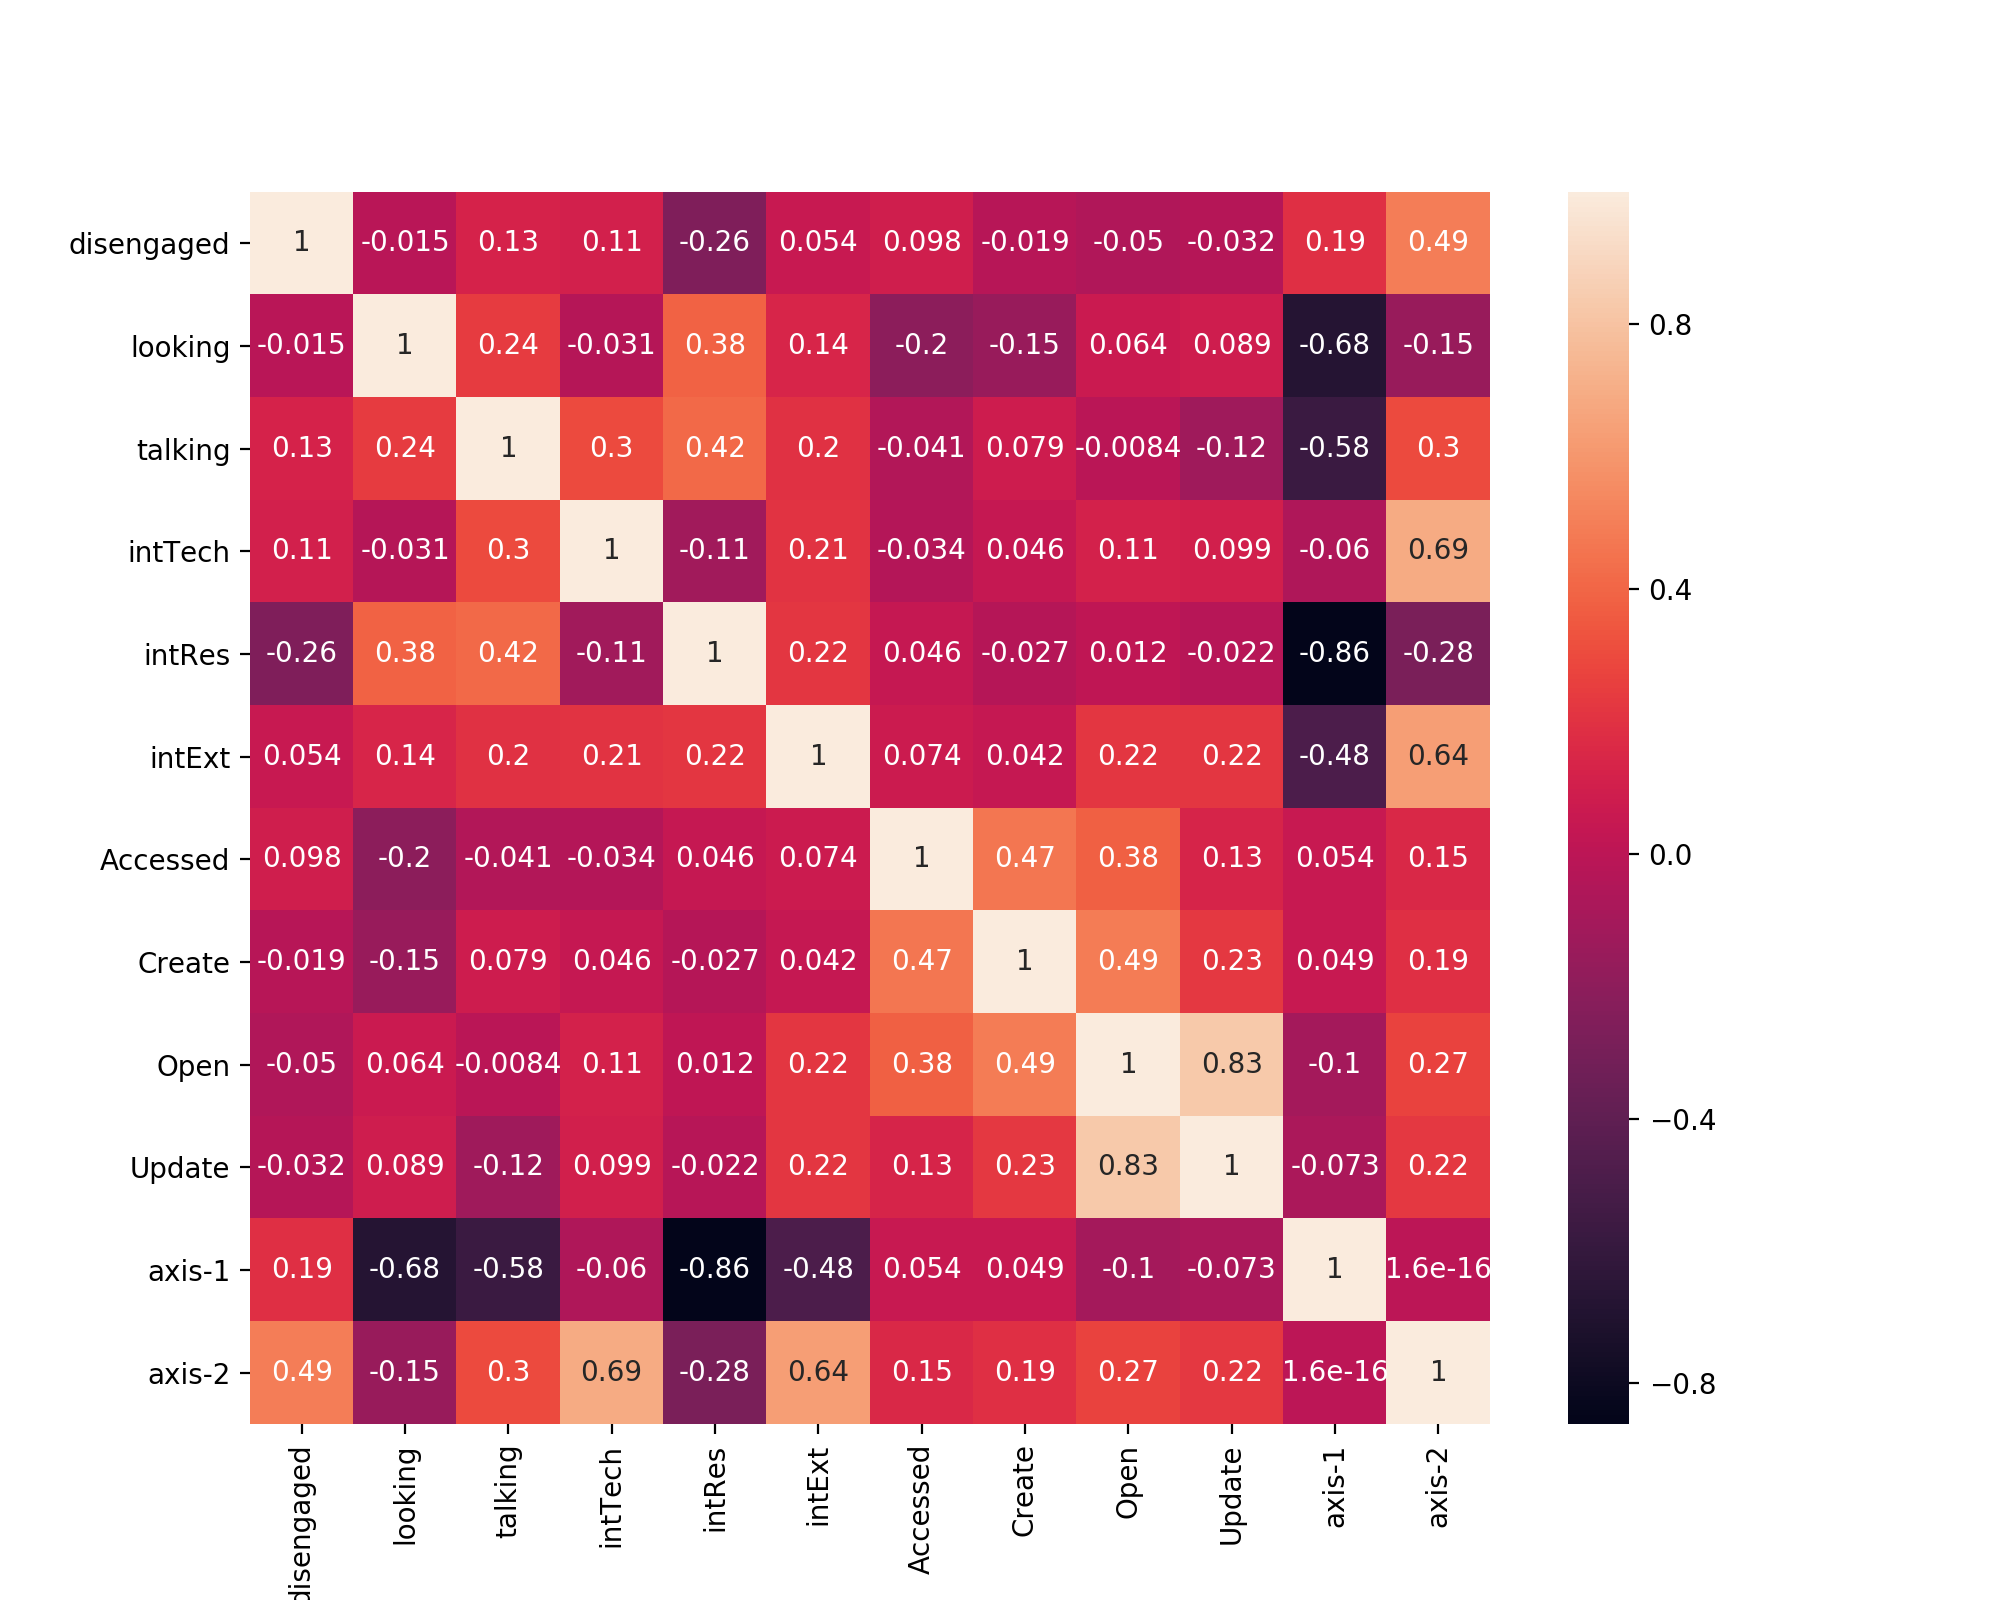

array([0.35268768, 0.4067928 , 0.32886445, 0.35249512, 0.44187911,
       0.4077738 , 0.22073661, 0.25308858, 0.18742688, 0.17541181])

In [58]:
# Apply PCA in minmax scaled data
pca = decomposition.PCA(n_components = 2)
scaled = preprocessing.MinMaxScaler().fit_transform(raw_data)
pca2d = pca.fit_transform(scaled)

pca2_raw = raw_data.copy()

# Adding pca results to data
pca2_raw['axis-1'] = pca2d[:,0]
pca2_raw['axis-2'] = pca2d[:,1]

plt.figure(figsize=(10, 8))
sns.heatmap(pca2_raw.corr(),annot=True)
np.std(scaled,axis=0)

### TSNE 

<IPython.core.display.Javascript object>


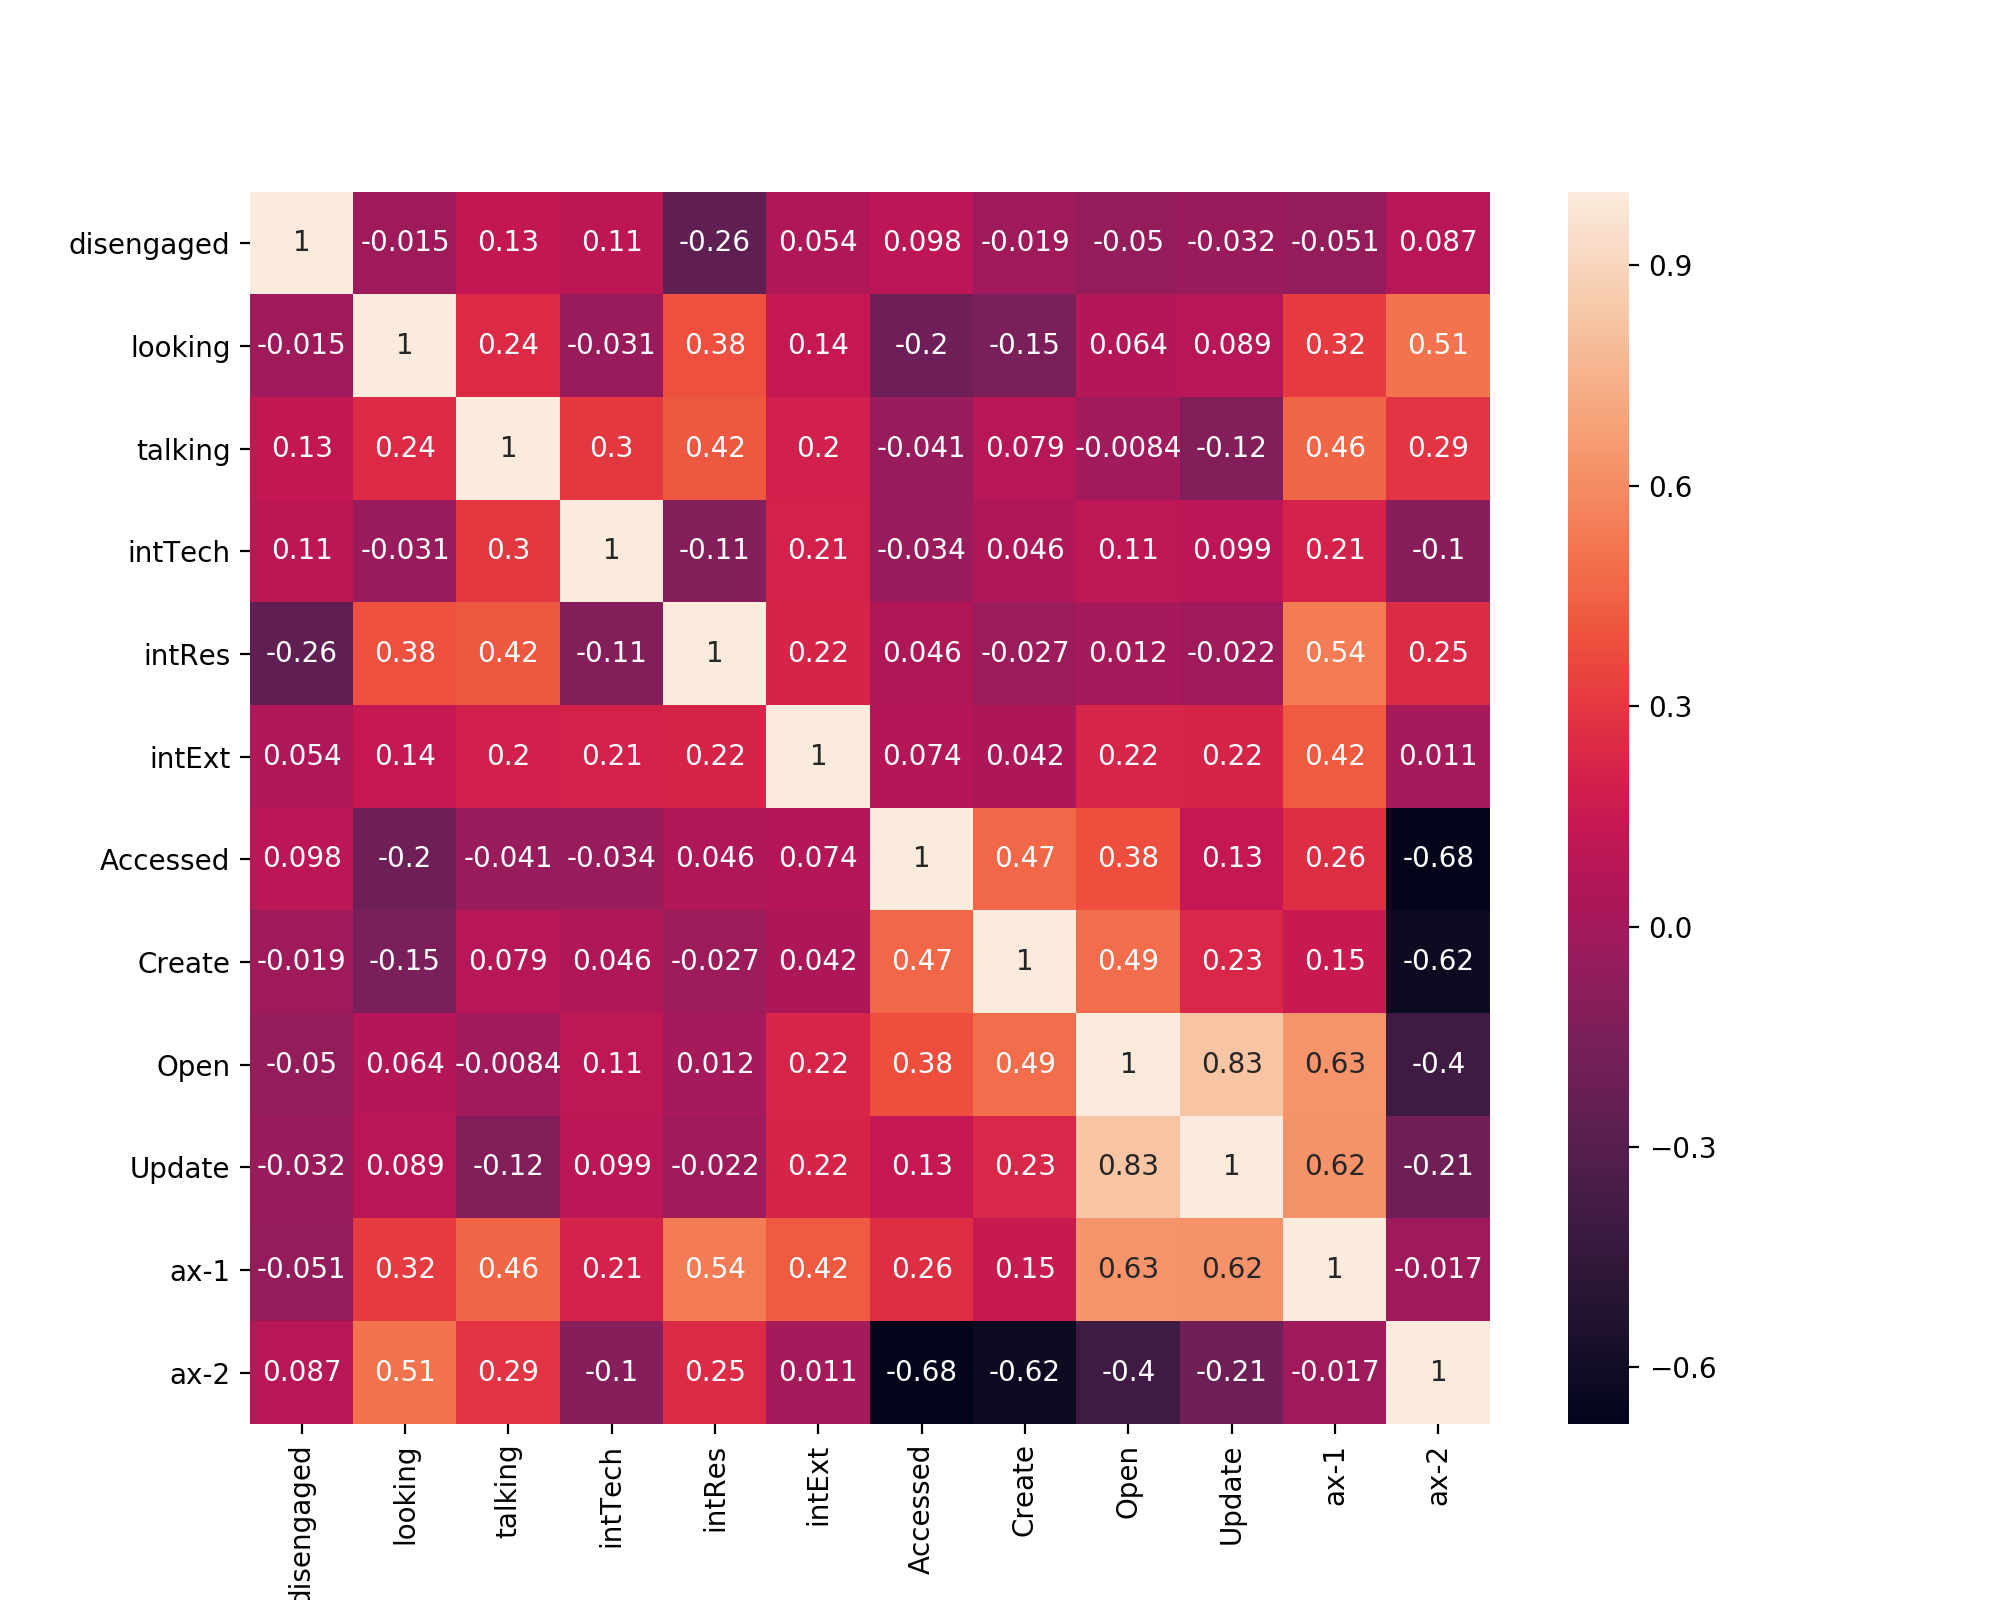

In [61]:
# Apply T-SNE
tsne = TSNE(n_components = 2)
tsne2d = tsne.fit_transform(preprocessing.StandardScaler().fit_transform(raw_data))


tsne_raw = raw_data
# Adding pca results to data
tsne_raw['ax-1'] = tsne2d[:,0]
tsne_raw['ax-2'] = tsne2d[:,1]

plt.figure(figsize=(10, 8))
sns.heatmap(tsne_raw.corr(),annot=True)